In [3]:
import pandas as pd 

In [4]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [6]:
import mysql.connector 

<h1>Question 1</h1>

1. Sales Prediction for the Next Quarter Using Historical Data Scenario: The Sales Team wants to predict the total sales for the next quarter (Q2 2023) based on historical sales data. Requirements:..1. Use the sales data from Q1 2022 to Q4 2022 to build a model that predicts total sales for Q2 2023. 2. Evaluate the model’s accuracy using a relevant error metric (e.g., MAE, RMSE). 3. Provide predictions for the upcoming quarter and identify any trends. Key Features to Use: • order_date • qty_ordered • Machine learning model libraries (e.g., Scikit-learn, Statsmodels)

In [67]:
import pandas as pd
import mysql.connector

# Connect to MySQL and fetch sales data
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="sales"
)

query = """
SELECT order_date, qty_ordered 
FROM order_detail 
WHERE order_date BETWEEN '2022-01-01' AND '2022-12-31'
"""

df = pd.read_sql(query, conn)
conn.close()

# Convert 'order_date' to datetime and set it as index
df['order_date'] = pd.to_datetime(df['order_date'])
df.set_index('order_date', inplace=True)

# Resample by Quarter to get total qty_ordered per quarter
df_quarterly = df.resample('Q').agg({'qty_ordered': 'sum'})

# Display the data to confirm
print(df_quarterly)


            qty_ordered
order_date             
2022-03-31         2213
2022-06-30         2521
2022-09-30         2970
2022-12-31          497


C:\Users\Dilshad\AppData\Local\Temp\ipykernel_7140\2531048434.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\Dilshad\AppData\Local\Temp\ipykernel_7140\2531048434.py:26: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df.resample('Q').agg({'qty_ordered': 'sum'})


In [69]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model on quarterly sales data
model = ARIMA(df_quarterly['qty_ordered'], order=(1,1,1))  # (p,d,q) parameters can be adjusted
model_fit = model.fit()

# Forecast sales for Q2 2023 (1 step ahead)
forecast = model_fit.forecast(steps=1)
predicted_sales_q2_2023 = forecast[0]

print(f"Predicted Sales for Q2 2023: {predicted_sales_q2_2023}")


C:\Users\Dilshad\Downloads\New folder\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Predicted Sales for Q2 2023: 1273.8935254649136


C:\Users\Dilshad\AppData\Local\Temp\ipykernel_7140\3389188768.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_sales_q2_2023 = forecast[0]


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Suppose actual Q1 2023 sales are known (use your data here)
actual_sales_q1_2023 = 22000  # Replace with actual sales data for Q1 2023

# Calculate error metrics
mae = mean_absolute_error([actual_sales_q1_2023], [predicted_sales_q2_2023])
rmse = np.sqrt(mean_squared_error([actual_sales_q1_2023], [predicted_sales_q2_2023]))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 20726.106474535085
RMSE: 20726.106474535085


C:\Users\Dilshad\AppData\Local\Temp\ipykernel_7140\368401129.py:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start='2023-04-01', periods=1, freq='Q')


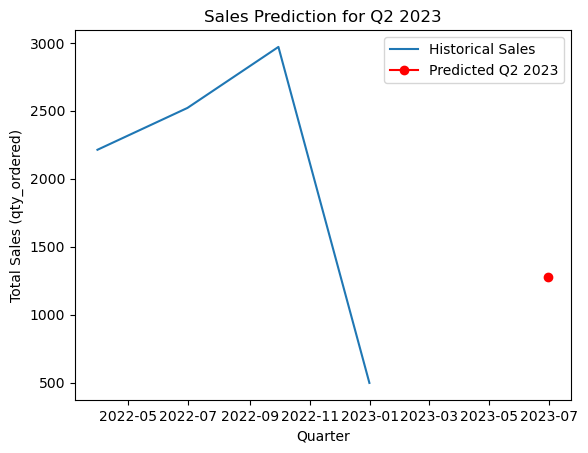

In [73]:
import matplotlib.pyplot as plt

# Plot historical sales (Q1-Q4 2022)
plt.plot(df_quarterly.index, df_quarterly['qty_ordered'], label='Historical Sales')

# Plot forecasted sales for Q2 2023
forecast_index = pd.date_range(start='2023-04-01', periods=1, freq='Q')
plt.plot(forecast_index, predicted_sales_q2_2023, label='Predicted Q2 2023', marker='o', color='red')

plt.title('Sales Prediction for Q2 2023')
plt.xlabel('Quarter')
plt.ylabel('Total Sales (qty_ordered)')
plt.legend()
plt.show()


In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual sales for Q1 2023 (replace with actual data)
actual_sales_q1_2023 = 22000  # Example value

# Predicted sales for Q2 2023 (from the ARIMA or other model)
predicted_sales_q2_2023 = 25000  # Example predicted value from your model

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error([actual_sales_q1_2023], [predicted_sales_q2_2023])
print(f"MAE: {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error([actual_sales_q1_2023], [predicted_sales_q2_2023]))
print(f"RMSE: {rmse}")


MAE: 3000.0
RMSE: 3000.0


In [75]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df_quarterly' contains quarterly sales data with 'qty_ordered'
# ARIMA model for forecasting Q2 2023
model = ARIMA(df_quarterly['qty_ordered'], order=(1,1,1))  # Adjust p,d,q as necessary
model_fit = model.fit()

# Forecast sales for Q2 2023 (1 step ahead)
forecast = model_fit.forecast(steps=1)
predicted_sales_q2_2023 = forecast[0]

print(f"Predicted Sales for Q2 2023: {predicted_sales_q2_2023}")


Predicted Sales for Q2 2023: 1273.8935254649136


C:\Users\Dilshad\Downloads\New folder\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Dilshad\AppData\Local\Temp\ipykernel_7140\2073199191.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_sales_q2_2023 = forecast[0]


C:\Users\Dilshad\AppData\Local\Temp\ipykernel_7140\3630413391.py:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start='2023-04-01', periods=1, freq='Q')


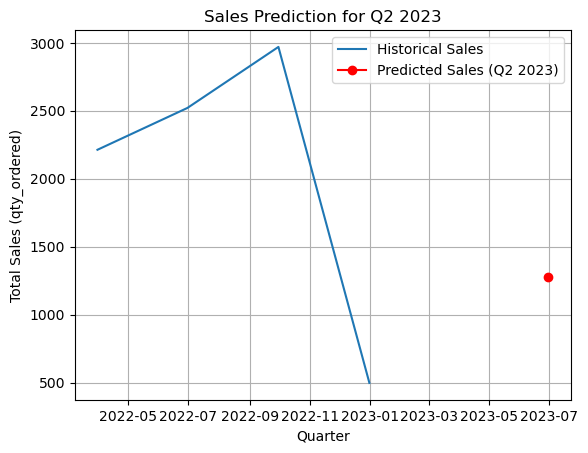

In [76]:
import matplotlib.pyplot as plt

# Plot historical quarterly sales (Q1 2022 - Q4 2022)
plt.plot(df_quarterly.index, df_quarterly['qty_ordered'], label='Historical Sales')

# Plot the predicted sales for Q2 2023
forecast_index = pd.date_range(start='2023-04-01', periods=1, freq='Q')
plt.plot(forecast_index, predicted_sales_q2_2023, label='Predicted Sales (Q2 2023)', marker='o', color='red')

# Customize the plot
plt.title('Sales Prediction for Q2 2023')
plt.xlabel('Quarter')
plt.ylabel('Total Sales (qty_ordered)')
plt.legend()
plt.grid(True)
plt.show()


In [77]:
import pandas as pd
import mysql.connector

# Connect to MySQL and fetch sales data
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="12345",
    database="sales"
)

query = """
SELECT order_date, qty_ordered 
FROM order_detail 
WHERE order_date BETWEEN '2022-01-01' AND '2022-12-31'
"""

# Load the data into a pandas DataFrame
df = pd.read_sql(query, conn)
conn.close()

# Convert the 'order_date' to a datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Set 'order_date' as the index of the DataFrame
df.set_index('order_date', inplace=True)

# Aggregate sales data by quarter
df_quarterly = df.resample('Q').agg({'qty_ordered': 'sum'})

# Display the first few rows of the data
print(df_quarterly.head())


            qty_ordered
order_date             
2022-03-31         2213
2022-06-30         2521
2022-09-30         2970
2022-12-31          497


C:\Users\Dilshad\AppData\Local\Temp\ipykernel_7140\3183359236.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\Dilshad\AppData\Local\Temp\ipykernel_7140\3183359236.py:29: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df.resample('Q').agg({'qty_ordered': 'sum'})


In [78]:
# Extract additional time features (quarter, month, etc.)
df_quarterly['quarter'] = df_quarterly.index.quarter
df_quarterly['year'] = df_quarterly.index.year

# Display the data with new features
print(df_quarterly.head())


            qty_ordered  quarter  year
order_date                            
2022-03-31         2213        1  2022
2022-06-30         2521        2  2022
2022-09-30         2970        3  2022
2022-12-31          497        4  2022


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare the features (X) and target variable (y)
X = df_quarterly[['quarter', 'year']]  # Features: quarter, year
y = df_quarterly['qty_ordered']         # Target: qty_ordered (sales)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Predict sales for Q2 2023
# For Q2 2023, year = 2023 and quarter = 2
q2_2023_pred = model.predict([[2, 2023]])
print(f"Predicted Sales for Q2 2023: {q2_2023_pred[0]}")


MAE: 2828.0
RMSE: 2828.0
Predicted Sales for Q2 2023: 2568.0


C:\Users\Dilshad\Downloads\New folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [80]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model on the sales data (quarterly)
model_arima = ARIMA(df_quarterly['qty_ordered'], order=(1, 1, 1))  # ARIMA(p,d,q)
model_arima_fit = model_arima.fit()

# Make a prediction for Q2 2023 (1 step ahead)
forecast = model_arima_fit.forecast(steps=1)
print(f"Predicted Sales for Q2 2023 (ARIMA): {forecast[0]}")


Predicted Sales for Q2 2023 (ARIMA): 1273.8935254649136


C:\Users\Dilshad\Downloads\New folder\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Dilshad\AppData\Local\Temp\ipykernel_7140\956982322.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted Sales for Q2 2023 (ARIMA): {forecast[0]}")


C:\Users\Dilshad\AppData\Local\Temp\ipykernel_7140\2257917623.py:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start='2023-04-01', periods=1, freq='Q')


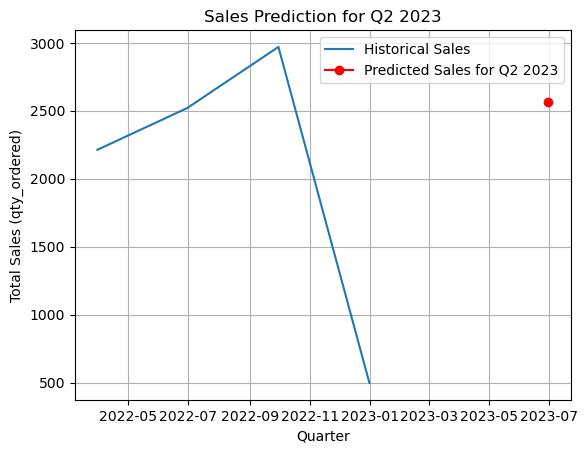

In [81]:
import matplotlib.pyplot as plt

# Plot historical sales (Q1-Q4 2022)
plt.plot(df_quarterly.index, df_quarterly['qty_ordered'], label='Historical Sales')

# Plot the predicted sales for Q2 2023
forecast_index = pd.date_range(start='2023-04-01', periods=1, freq='Q')
plt.plot(forecast_index, q2_2023_pred, label='Predicted Sales for Q2 2023', marker='o', color='red')

plt.title('Sales Prediction for Q2 2023')
plt.xlabel('Quarter')
plt.ylabel('Total Sales (qty_ordered)')
plt.legend()
plt.grid(True)
plt.show()


In [83]:
import os
# Define the folder path and DataFrame
folder_path = r"C:\\Users\\Dilshad\\Downloads\\Google Looker project3\\dataset3"
file_path = os.path.join(folder_path, "finaldatabase3.csv")

# Ensure the folder exists; create it if it doesn't
os.makedirs(folder_path, exist_ok=True)


# Save DataFrame to CSV
df.to_csv(file_path, index=False)

print(f"File successfully saved to {file_path}")

File successfully saved to C:\\Users\\Dilshad\\Downloads\\Google Looker project3\\dataset3\finaldatabase3.csv


In [84]:
df_quarterly['predicted_sales'] = [None] * (len(df_quarterly) - 1) + [q2_2023_pred[0]]

df_quarterly.to_csv("sales_forecast.csv", index=True)

print("Data saved to sales_forecast.csv")


Data saved to sales_forecast.csv
